In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,413 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 558 kB/s 
     |████████████████████████████████| 465 kB 70.9 MB/s 


In [ ]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype

In [ ]:
import nltk
from konlpy.tag import Okt
from wordcloud import WordCloud
from collections import defaultdict
from collections import Counter
from nltk.corpus import stopwords

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
raw_data_19 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/추가데이터/NH농협캐피탈 데이터 작업_성과관리_1111.xlsx', sheet_name=0)
major = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/dataset/전공 대분류.xlsx')

In [ ]:
raw_data_19['전공'] = major['대분류']

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49472 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52280 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50668 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54943 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49688 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48393 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49324 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

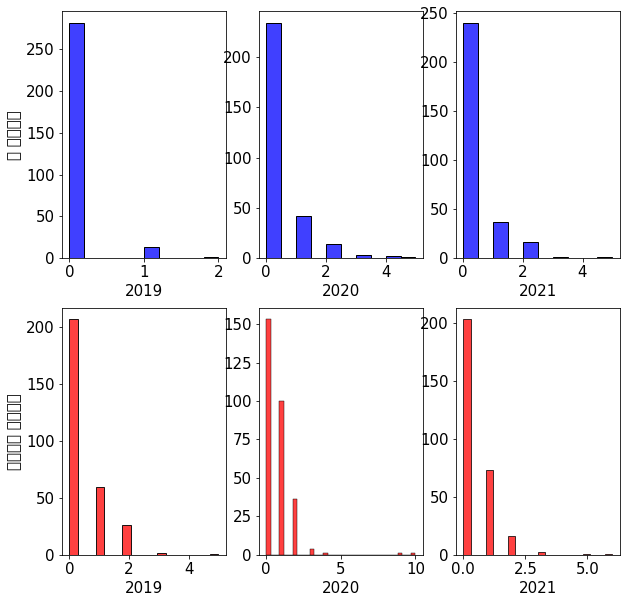

In [ ]:
raw_data_20 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/추가데이터/NH농협캐피탈 데이터 작업_성과관리_1111.xlsx', sheet_name=1)
raw_data_21 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/추가데이터/NH농협캐피탈 데이터 작업_성과관리_1111.xlsx', sheet_name=2)

raw_data_19['셀 참여횟수'] = raw_data_19['셀 참여횟수'].fillna(0)
raw_data_19['봉사활동 참여횟수'] = raw_data_19['봉사활동 참여횟수'].fillna(0)
raw_data_20['셀 참여횟수'] = raw_data_20['셀 참여횟수'].fillna(0)
raw_data_20['봉사활동 참여횟수'] = raw_data_20['봉사활동 참여횟수'].fillna(0)
raw_data_21['셀 참여횟수'] = raw_data_21['셀 참여횟수'].fillna(0)
raw_data_21['봉사활동 참여횟수'] = raw_data_21['봉사활동 참여횟수'].fillna(0)

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams.update({'font.size': 15})

fig, axes = plt.subplots(2, 3)
axes[0, 0].set_xlabel("2019")
axes[0, 1].set_xlabel("2020")
axes[0, 2].set_xlabel("2021")
axes[1, 0].set_xlabel("2019")
axes[1, 1].set_xlabel("2020")
axes[1, 2].set_xlabel("2021")
axes[0,0].set_ylabel("셀 참여횟수")
axes[0,1].set_ylabel(" ")
axes[0,2].set_ylabel(" ")
axes[1,0].set_ylabel("봉사활동 참여횟수")
axes[1,1].set_ylabel(" ")
axes[1,2].set_ylabel(" ")

sns.histplot(raw_data_19["셀 참여횟수"], color="blue", ax = axes[0, 0])
sns.histplot(raw_data_19['봉사활동 참여횟수'], color="red", ax = axes[1, 0])
sns.histplot(raw_data_20["셀 참여횟수"], color="blue", ax = axes[0, 1])
sns.histplot(raw_data_20['봉사활동 참여횟수'], color="red", ax = axes[1, 1])
sns.histplot(raw_data_21["셀 참여횟수"], color="blue", ax = axes[0, 2])
sns.histplot(raw_data_21['봉사활동 참여횟수'], color="red", ax = axes[1, 2])
plt.show()

In [ ]:
sen1_data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/dataset/sentiment_19년상.xlsx')
sen2_data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/dataset/sentiment_19년하.xlsx')
sen3_data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/dataset/sentiment_20년상.xlsx')
sen4_data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/dataset/sentiment_20년하.xlsx')
sen5_data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/dataset/sentiment_21년하.xlsx')

In [ ]:
sen1 = sen1_data['사번'].unique()
sen2 = sen2_data['사번'].unique()
sen_2019 = list(set(np.append(sen1, sen2)))

In [ ]:
sen3 = sen3_data['사번'].unique()
sen4 = sen4_data['사번'].unique()
sen_2020 = list(set(np.append(sen3, sen4)))

In [ ]:
sen_2021 = sen5_data['사번'].unique()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52293 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49688 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54665 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45733 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47141 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

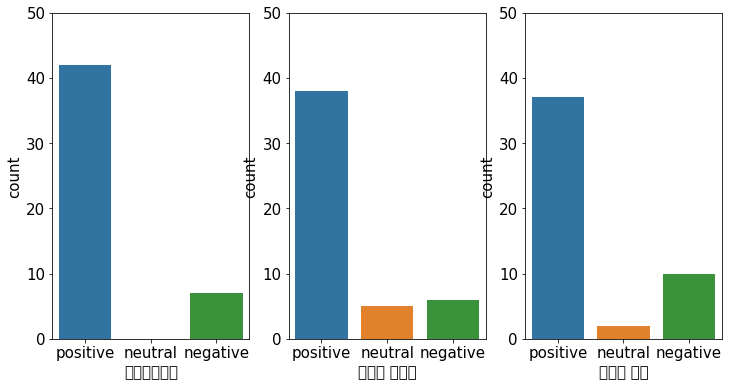

In [ ]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 6)
axes[0].set_ylim(0,50)
axes[1].set_ylim(0,50)
axes[2].set_ylim(0,50)
sns.countplot(x='직책수행능력', data=sen1_data, ax=axes[0], order=['positive', 'neutral', 'negative'])
sns.countplot(x='조직내 필요성', data=sen1_data, ax=axes[1], order=['positive', 'neutral', 'negative'])
sns.countplot(x='동반자 의식', data=sen1_data, ax=axes[2], order=['positive', 'neutral', 'negative'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52293 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49688 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54665 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45733 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47141 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

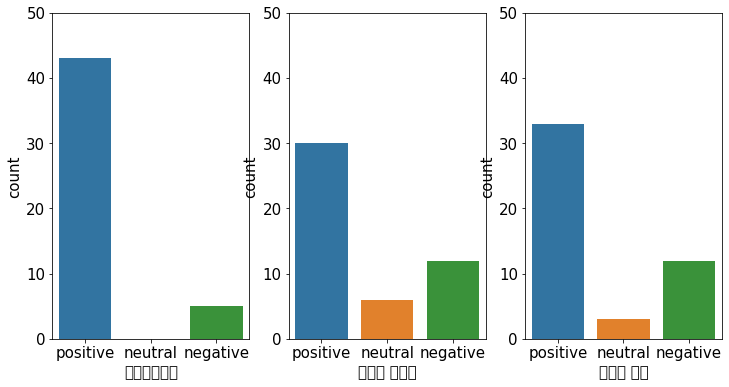

In [ ]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 6)
axes[0].set_ylim(0,50)
axes[1].set_ylim(0,50)
axes[2].set_ylim(0,50)
sns.countplot(x='직책수행능력', data=sen2_data, ax=axes[0], order=['positive', 'neutral', 'negative'])
sns.countplot(x='조직내 필요성', data=sen2_data, ax=axes[1], order=['positive', 'neutral', 'negative'])
sns.countplot(x='동반자 의식', data=sen2_data, ax=axes[2], order=['positive', 'neutral', 'negative'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52293 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49688 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54665 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45733 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47141 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

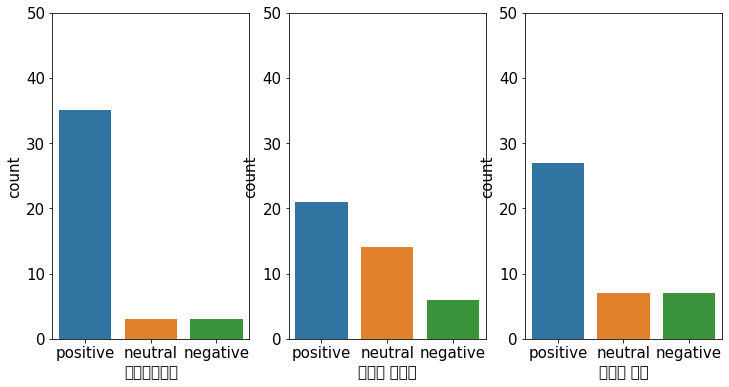

In [ ]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 6)
axes[0].set_ylim(0,50)
axes[1].set_ylim(0,50)
axes[2].set_ylim(0,50)
sns.countplot(x='직책수행능력', data=sen3_data, ax=axes[0], order=['positive', 'neutral', 'negative'])
sns.countplot(x='조직내 필요성', data=sen3_data, ax=axes[1], order=['positive', 'neutral', 'negative'])
sns.countplot(x='동반자 의식', data=sen3_data, ax=axes[2], order=['positive', 'neutral', 'negative'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52293 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49688 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54665 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45733 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47141 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

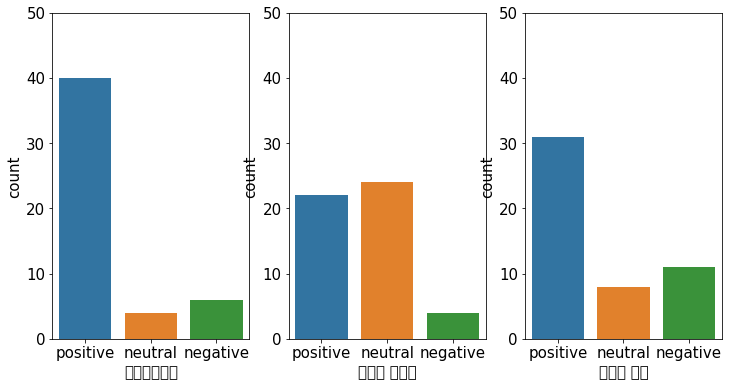

In [ ]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 6)
axes[0].set_ylim(0,50)
axes[1].set_ylim(0,50)
axes[2].set_ylim(0,50)
sns.countplot(x='직책수행능력', data=sen4_data, ax=axes[0], order=['positive', 'neutral', 'negative'])
sns.countplot(x='조직내 필요성', data=sen4_data, ax=axes[1], order=['positive', 'neutral', 'negative'])
sns.countplot(x='동반자 의식', data=sen4_data, ax=axes[2], order=['positive', 'neutral', 'negative'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52293 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49688 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54665 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45733 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47141 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

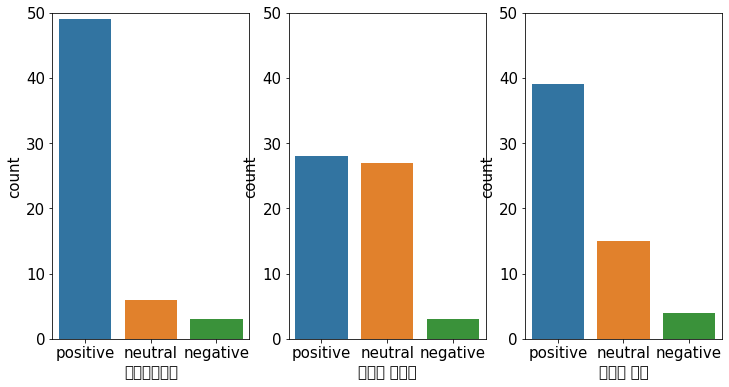

In [ ]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 6)
axes[0].set_ylim(0,50)
axes[1].set_ylim(0,50)
axes[2].set_ylim(0,50)
sns.countplot(x='직책수행능력', data=sen5_data, ax=axes[0], order=['positive', 'neutral', 'negative'])
sns.countplot(x='조직내 필요성', data=sen5_data, ax=axes[1], order=['positive', 'neutral', 'negative'])
sns.countplot(x='동반자 의식', data=sen5_data, ax=axes[2], order=['positive', 'neutral', 'negative'])

In [ ]:
sen1_data = sen1_data.replace('positive', 1)
sen1_data = sen1_data.replace('negative', -1)
sen1_data = sen1_data.replace('neutral', 0)

In [ ]:
sen2_data = sen2_data.replace('positive', 1)
sen2_data = sen2_data.replace('negative', -1)
sen2_data = sen2_data.replace('neutral', 0)

In [ ]:
sen3_data = sen3_data.replace('positive', 1)
sen3_data = sen3_data.replace('negative', -1)
sen3_data = sen3_data.replace('neutral', 0)

In [ ]:
sen4_data = sen4_data.replace('positive', 1)
sen4_data = sen4_data.replace('negative', -1)
sen4_data = sen4_data.replace('neutral', 0)

In [ ]:
sen5_data = sen5_data.replace('positive', 1)
sen5_data = sen5_data.replace('negative', -1)
sen5_data = sen5_data.replace('neutral', 0)

In [ ]:
con_list = []
for name in sen_2019 : 
  temp_list = []
  temp_list.append(name)
  first = sen1_data.loc[sen1_data['사번']==name].reset_index(drop=True)
  half = sen2_data.loc[sen2_data['사번']==name].reset_index(drop=True)
  if (len(first)==0 and len(half)!=0) : 
    temp_list.append(half['직책수행능력'][0])
    temp_list.append(half['조직내 필요성'][0])
    temp_list.append(half['동반자 의식'][0])
  elif (len(half)==0 and len(first)!=0) : 
    temp_list.append(first['직책수행능력'][0])
    temp_list.append(first['조직내 필요성'][0])
    temp_list.append(first['동반자 의식'][0])
  else : 
    if (first['직책수행능력'][0]+half['직책수행능력'][0] > 0) : 
      temp_list.append(1)
    elif (first['직책수행능력'][0]+half['직책수행능력'][0] < 0) : 
      temp_list.append(-1)
    else : 
      temp_list.append(0)
    
    if (first['조직내 필요성'][0]+half['조직내 필요성'][0] > 0) : 
      temp_list.append(1)
    elif (first['조직내 필요성'][0]+half['조직내 필요성'][0] < 0) : 
      temp_list.append(-1)
    else : 
      temp_list.append(0)

    if (first['동반자 의식'][0]+half['동반자 의식'][0] > 0) : 
      temp_list.append(1)
    elif (first['동반자 의식'][0]+half['동반자 의식'][0] < 0) : 
      temp_list.append(-1)
    else : 
      temp_list.append(0)

  con_list.append(temp_list)

sentiment_2019 = pd.DataFrame(con_list, columns=['사번', '직책수행능력', '조직내 필요성', '동반자 의식'])

In [ ]:
con_list = []
for name in sen_2020 : 
  temp_list = []
  temp_list.append(name)
  first = sen3_data.loc[sen3_data['사번']==name].reset_index(drop=True)
  half = sen4_data.loc[sen4_data['사번']==name].reset_index(drop=True)
  if (len(first)==0 and len(half)!=0) : 
    temp_list.append(half['직책수행능력'][0])
    temp_list.append(half['조직내 필요성'][0])
    temp_list.append(half['동반자 의식'][0])
  elif (len(half)==0 and len(first)!=0) : 
    temp_list.append(first['직책수행능력'][0])
    temp_list.append(first['조직내 필요성'][0])
    temp_list.append(first['동반자 의식'][0])
  else : 
    if (first['직책수행능력'][0]+half['직책수행능력'][0] > 0) : 
      temp_list.append(1)
    elif (first['직책수행능력'][0]+half['직책수행능력'][0] < 0) : 
      temp_list.append(-1)
    else : 
      temp_list.append(0)
    
    if (first['조직내 필요성'][0]+half['조직내 필요성'][0] > 0) : 
      temp_list.append(1)
    elif (first['조직내 필요성'][0]+half['조직내 필요성'][0] < 0) : 
      temp_list.append(-1)
    else : 
      temp_list.append(0)

    if (first['동반자 의식'][0]+half['동반자 의식'][0] > 0) : 
      temp_list.append(1)
    elif (first['동반자 의식'][0]+half['동반자 의식'][0] < 0) : 
      temp_list.append(-1)
    else : 
      temp_list.append(0)

  con_list.append(temp_list)

sentiment_2020 = pd.DataFrame(con_list, columns=['사번', '직책수행능력', '조직내 필요성', '동반자 의식'])

In [ ]:
sentiment_2021 = sen5_data

In [ ]:
en_list = []

f_list = ['전문성_평균평점_상반기', '리더십_평균평점_상반기', '부하육성_평균평점_상반기',
       '관계관리_평균평점_상반기', '조직비전_평균평점_상반기', '직책수행능력_평균평점_상반기', '조직내 필요성_평균평점_상반기',
       '동반자 의식_평균평점_상반기']
h_list = ['전문성_평균평점_하반기', '리더십_평균평점_하반기', '부하육성_평균평점_하반기',
       '관계관리_평균평점_하반기', '조직비전_평균평점_하반기', '직책수행능력_평균평점_하반기', '조직내 필요성_평균평점_하반기',
       '동반자 의식_평균평점_하반기']

for i in range(len(raw_data_19)) : 
  temp = [] 
  j = 0
  for name in f_list : 
    if (type(raw_data_19[name][i])==type(str()) and type(raw_data_19[h_list[j]][i])!=type(str())) : 
      temp.append(raw_data_19[h_list[j]][i])
    elif (type(raw_data_19[name][i])!=type(str()) and type(raw_data_19[h_list[j]][i])==type(str())) : 
      temp.append(raw_data_19[name][i])
    elif (type(raw_data_19[name][i])==type(str()) and type(raw_data_19[h_list[j]][i])==type(str())) : 
      temp.append("No")
    else : 
      avg = (raw_data_19[name][i]+raw_data_19[h_list[j]][i])/2
      temp.append(avg)
    j += 1
  en_list.append(temp)

In [ ]:
raw_data_19[['전문성_평균평점', '리더십_평균평점', '부하육성_평균평점', '관계관리_평균평점', '조직비전_평균평점', '직책수행능력_평균평점', '조직내 필요성_평균평점', '동반자 의식_평균평점']] = en_list
raw_data_19 = raw_data_19.drop(f_list, axis=1)
raw_data_19 = raw_data_19.drop(h_list, axis=1)

In [ ]:
tmp = pd.DataFrame(columns=raw_data_19.columns)
for name in sen_2019 : 
  temp = raw_data_19.loc[raw_data_19['사번']==name]
  tmp = pd.concat([tmp, temp], ignore_index=True, axis=0)

In [ ]:
tmp = tmp.join(sentiment_2019.set_index('사번')['직책수행능력'], on='사번')
tmp = tmp.join(sentiment_2019.set_index('사번')['조직내 필요성'], on='사번')
tmp = tmp.join(sentiment_2019.set_index('사번')['동반자 의식'], on='사번')

In [ ]:
data_2019 = tmp
print(len(data_2019))

44


In [ ]:
temp_19 = raw_data_19
b = data_2019['사번'].tolist()

for i in range(len(raw_data_19)) : 
  if(raw_data_19['사번'][i] in b) : 
    temp_19 = temp_19.drop([i], axis=0)

temp_19 = temp_19.loc[temp_19['역량평가등급']!='미입사']
temp_19 = temp_19.loc[temp_19['역량평가등급']!='미평가']

In [ ]:
# feature 유형에 따른 데이터 분포 시각화
sort = pd.DataFrame({'S':[5],'A':[4],'B':[3],'C':[2],'D':[1]}).T

data = temp_19['역량평가등급'].value_counts().sort_values(ascending=False)
data1 = pd.concat([pd.DataFrame(data),sort],axis=1).sort_values(by=0,ascending=False)

if (temp_19['역량평가등급'].dtypes=='object') : 
  # barplot
  trace = go.Bar(x = data1.index,
                text = ['{:.1f} %'.format(val) for val in (data1['역량평가등급'].values / temp_19.shape[0] * 100)],
                textposition = 'auto',
                textfont = dict(color = '#000000'),
                y = data1['역량평가등급'].values,
                )
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('역량평가등급'),
                xaxis = dict(title = '역량평가등급'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)
else : 
  # histplot
  trace = go.Box(y=temp_19['역량평가등급'], name="Boxplot", jitter=0.3, pointpos=-1.8, boxpoints='all')
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('역량평가등급'),
                xaxis = dict(title = '역량평가등급'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)

In [ ]:
sort = pd.DataFrame({'S':[5],'A':[4],'B':[3],'C':[2],'D':[1]}).T

data = temp_19['업적평가등급'].value_counts().sort_values(ascending=False)
data1 = pd.concat([pd.DataFrame(data),sort],axis=1).sort_values(by=0,ascending=False)

if (temp_19['업적평가등급'].dtypes=='object') : 
  # barplot
  trace = go.Bar(x = data1.index,
                text = ['{:.1f} %'.format(val) for val in (data1['업적평가등급'].values / temp_19.shape[0] * 100)],
                textposition = 'auto',
                textfont = dict(color = '#000000'),
                y = data1['업적평가등급'].values,
                )
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('업적평가등급'),
                xaxis = dict(title = '업적평가등급'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)
else : 
  # histplot
  trace = go.Box(y=temp_19['업적평가등급'], name="Boxplot", jitter=0.3, pointpos=-1.8, boxpoints='all')
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('업적평가등급'),
                xaxis = dict(title = '업적평가등급'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)

In [ ]:
print(temp_19['셀 참여횟수'].value_counts())

0.0    143
1.0      8
2.0      1
Name: 셀 참여횟수, dtype: int64


In [ ]:
sort = pd.DataFrame({'S':[5],'A':[4],'B':[3],'C':[2],'D':[1]}).T

data = temp_19['금년 교육이수 여부'].value_counts().sort_values(ascending=False)

if (temp_19['금년 교육이수 여부'].dtypes=='object') : 
  # barplot
  trace = go.Bar(x = data.index,
                text = ['{:.1f} %'.format(val) for val in (data.values / temp_19.shape[0] * 100)],
                textposition = 'auto',
                textfont = dict(color = '#000000'),
                y = data.values,
                )
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('금년 교육이수 여부'),
                xaxis = dict(title = '금년 교육이수 여부'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)
else : 
  # histplot
  trace = go.Box(y=temp_19['금년 교육이수 여부'], name="Boxplot", jitter=0.3, pointpos=-1.8, boxpoints='all')
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('금년 교육이수 여부'),
                xaxis = dict(title = '금년 교육이수 여부'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52293 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49688 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54665 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45733 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47141 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

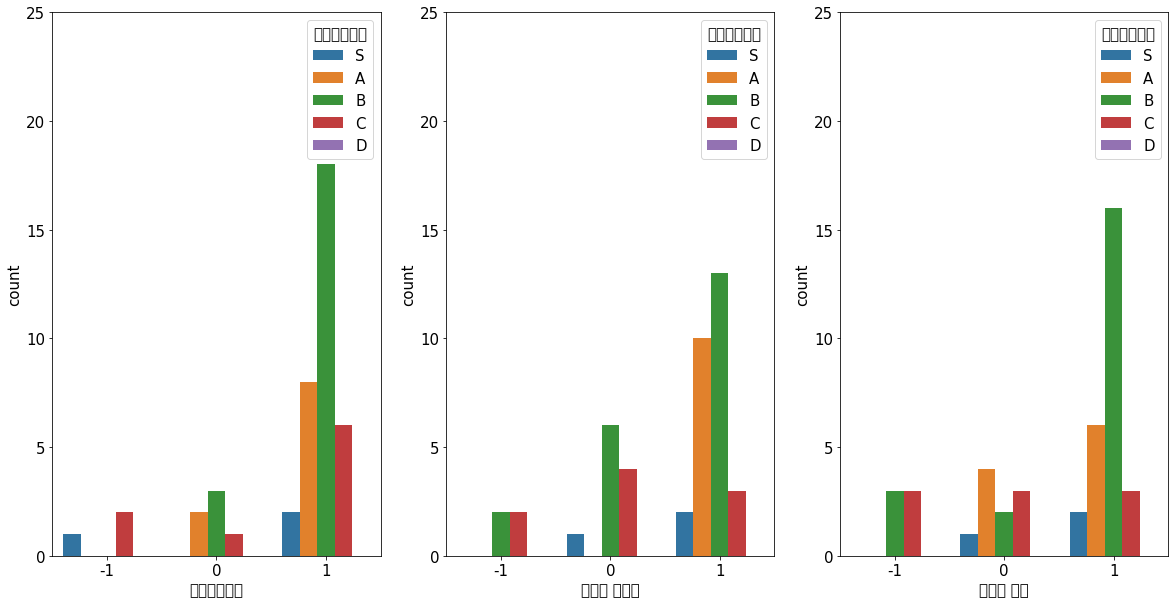

In [ ]:
from plotly.subplots import make_subplots

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(20, 10)
axes[0].set_ylim(0,25)
axes[1].set_ylim(0,25)
axes[2].set_ylim(0,25)
sns.countplot(x='직책수행능력', data=data_2019, hue='역량평가등급', ax=axes[0], hue_order=['S', 'A','B','C','D'])
sns.countplot(x='조직내 필요성', data=data_2019, hue='역량평가등급', ax=axes[1],  hue_order=['S', 'A','B','C','D'])
sns.countplot(x='동반자 의식', data=data_2019, hue='역량평가등급', ax=axes[2],  hue_order=['S', 'A','B','C','D'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52293 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49688 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54665 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45733 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47141 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

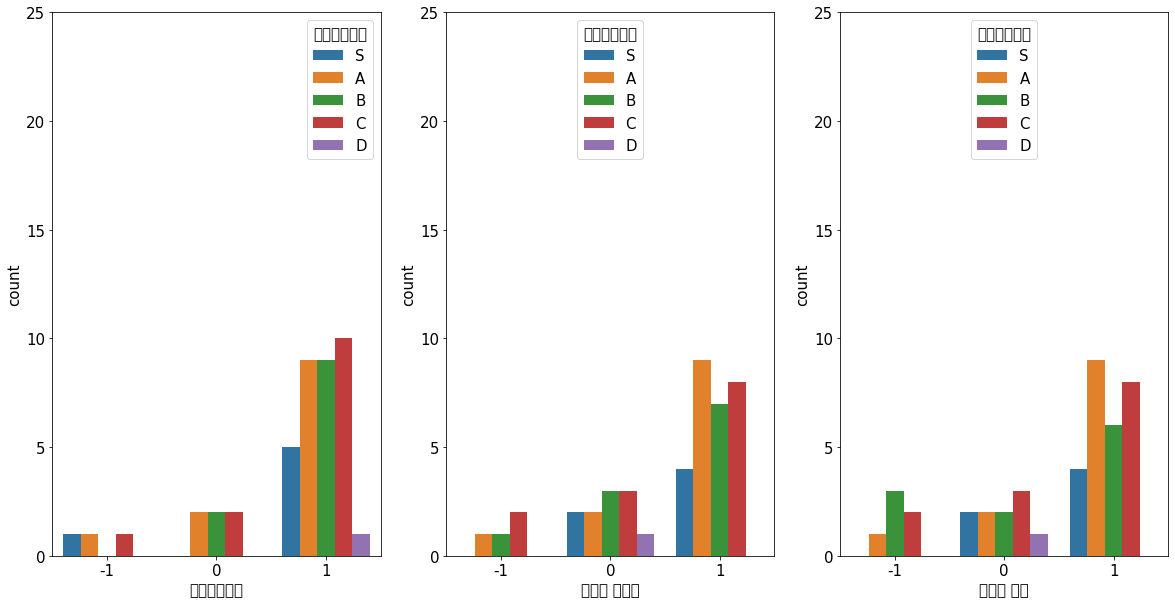

In [ ]:
from plotly.subplots import make_subplots

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(20, 10)
axes[0].set_ylim(0,25)
axes[1].set_ylim(0,25)
axes[2].set_ylim(0,25)
sns.countplot(x='직책수행능력', data=data_2019, hue='업적평가등급', ax=axes[0], hue_order=['S', 'A','B','C','D'])
sns.countplot(x='조직내 필요성', data=data_2019, hue='업적평가등급', ax=axes[1],  hue_order=['S', 'A','B','C','D'])
sns.countplot(x='동반자 의식', data=data_2019, hue='업적평가등급', ax=axes[2],  hue_order=['S', 'A','B','C','D'])

In [ ]:
table = []

for i in range(len(raw_data_19)) : 
  sen = []
  if (raw_data_19['사번'][i] in data_2019['사번'].unique()) : 
    temp = data_2019.loc[data_2019['사번']==raw_data_19['사번'][i]].reset_index(drop=True)
    sen.append(temp['직책수행능력'][0])
    sen.append(temp['조직내 필요성'][0])
    sen.append(temp['동반자 의식'][0])
  else : 
    sen.append('No')
    sen.append('No')
    sen.append('No')
  table.append(sen)

In [ ]:
raw_data_19[['직책수행능력', '조직내 필요성', '동반자 의식']] = table

In [ ]:
raw_data_20 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/추가데이터/NH농협캐피탈 데이터 작업_성과관리_1111.xlsx', sheet_name=1)

In [ ]:
raw_data_20['전공'] = major['대분류']

In [ ]:
en_list = []

f_list = ['전문성_평균평점_상반기', '리더십_평균평점_상반기', '부하육성_평균평점_상반기',
       '관계관리_평균평점_상반기', '조직비전_평균평점_상반기', '직책수행능력_평균평점_상반기', '조직내 필요성_평균평점_상반기',
       '동반자 의식_평균평점_상반기']
h_list = ['전문성_평균평점_하반기', '리더십_평균평점_하반기', '부하육성_평균평점_하반기',
       '관계관리_평균평점_하반기', '조직비전_평균평점_하반기', '직책수행능력_평균평점_하반기', '조직내 필요성_평균평점_하반기',
       '동반자 의식_평균평점_하반기']

for i in range(len(raw_data_20)) : 
  temp = [] 
  j = 0
  for name in f_list : 
    if (type(raw_data_20[name][i])==type(str()) and type(raw_data_20[h_list[j]][i])!=type(str())) : 
      temp.append(raw_data_20[h_list[j]][i])
    elif (type(raw_data_20[name][i])!=type(str()) and type(raw_data_20[h_list[j]][i])==type(str())) : 
      temp.append(raw_data_20[name][i])
    elif (type(raw_data_20[name][i])==type(str()) and type(raw_data_20[h_list[j]][i])==type(str())) : 
      temp.append("No")
    else : 
      avg = (raw_data_20[name][i]+raw_data_20[h_list[j]][i])/2
      temp.append(avg)
    j += 1
  en_list.append(temp)

In [ ]:
raw_data_20[['전문성_평균평점', '리더십_평균평점', '부하육성_평균평점', '관계관리_평균평점', '조직비전_평균평점', '직책수행능력_평균평점', '조직내 필요성_평균평점', '동반자 의식_평균평점']] = en_list
raw_data_20 = raw_data_20.drop(f_list, axis=1)
raw_data_20 = raw_data_20.drop(h_list, axis=1)

In [ ]:
tmp = pd.DataFrame(columns=raw_data_20.columns)
for name in sen_2020 : 
  temp = raw_data_20.loc[raw_data_20['사번']==name]
  tmp = pd.concat([tmp, temp], ignore_index=True, axis=0)

In [ ]:
tmp = tmp.join(sentiment_2020.set_index('사번')['직책수행능력'], on='사번')
tmp = tmp.join(sentiment_2020.set_index('사번')['조직내 필요성'], on='사번')
tmp = tmp.join(sentiment_2020.set_index('사번')['동반자 의식'], on='사번')

In [ ]:
data_2020 = tmp
print(len(data_2020))

45


In [ ]:
temp_20 = raw_data_20
b = data_2020['사번'].tolist()

for i in range(len(raw_data_20)) : 
  if(raw_data_20['사번'][i] in b) : 
    temp_20 = temp_20.drop([i], axis=0)

temp_20 = temp_20.loc[temp_20['역량평가등급']!='미입사']
temp_20 = temp_20.loc[temp_20['역량평가등급']!='미평가']

In [ ]:
# feature 유형에 따른 데이터 분포 시각화
sort = pd.DataFrame({'S':[5],'A':[4],'B':[3],'C':[2],'D':[1]}).T

data = temp_20['역량평가등급'].value_counts().sort_values(ascending=False)
data1 = pd.concat([pd.DataFrame(data),sort],axis=1).sort_values(by=0,ascending=False)

if (temp_20['역량평가등급'].dtypes=='object') : 
  # barplot
  trace = go.Bar(x = data1.index,
                text = ['{:.1f} %'.format(val) for val in (data1['역량평가등급'].values / temp_20.shape[0] * 100)],
                textposition = 'auto',
                textfont = dict(color = '#000000'),
                y = data1['역량평가등급'].values,
                )
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('역량평가등급'),
                xaxis = dict(title = '역량평가등급'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)
else : 
  # histplot
  trace = go.Box(y=temp_20['역량평가등급'], name="Boxplot", jitter=0.3, pointpos=-1.8, boxpoints='all')
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('역량평가등급'),
                xaxis = dict(title = '역량평가등급'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)

In [ ]:
sort = pd.DataFrame({'S':[5],'A':[4],'B':[3],'C':[2],'D':[1]}).T

data = temp_20['업적평가등급'].value_counts().sort_values(ascending=False)
data1 = pd.concat([pd.DataFrame(data),sort],axis=1).sort_values(by=0,ascending=False)

if (temp_20['업적평가등급'].dtypes=='object') : 
  # barplot
  trace = go.Bar(x = data1.index,
                text = ['{:.1f} %'.format(val) for val in (data1['업적평가등급'].values / temp_20.shape[0] * 100)],
                textposition = 'auto',
                textfont = dict(color = '#000000'),
                y = data1['업적평가등급'].values,
                )
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('업적평가등급'),
                xaxis = dict(title = '업적평가등급'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)
else : 
  # histplot
  trace = go.Box(y=temp_20['업적평가등급'], name="Boxplot", jitter=0.3, pointpos=-1.8, boxpoints='all')
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('업적평가등급'),
                xaxis = dict(title = '업적평가등급'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)

In [ ]:
print(temp_20['셀 참여횟수'].value_counts())

1.0    31
2.0    11
3.0     2
Name: 셀 참여횟수, dtype: int64


In [ ]:
sort = pd.DataFrame({'S':[5],'A':[4],'B':[3],'C':[2],'D':[1]}).T

data = temp_20['금년 교육이수 여부'].value_counts().sort_values(ascending=False)

if (temp_20['금년 교육이수 여부'].dtypes=='object') : 
  # barplot
  trace = go.Bar(x = data.index,
                text = ['{:.1f} %'.format(val) for val in (data.values / temp_20.shape[0] * 100)],
                textposition = 'auto',
                textfont = dict(color = '#000000'),
                y = data.values,
                )
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('금년 교육이수 여부'),
                xaxis = dict(title = '금년 교육이수 여부'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)
else : 
  # histplot
  trace = go.Box(y=temp_20['금년 교육이수 여부'], name="Boxplot", jitter=0.3, pointpos=-1.8, boxpoints='all')
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('금년 교육이수 여부'),
                xaxis = dict(title = '금년 교육이수 여부'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52293 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49688 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54665 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45733 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47141 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

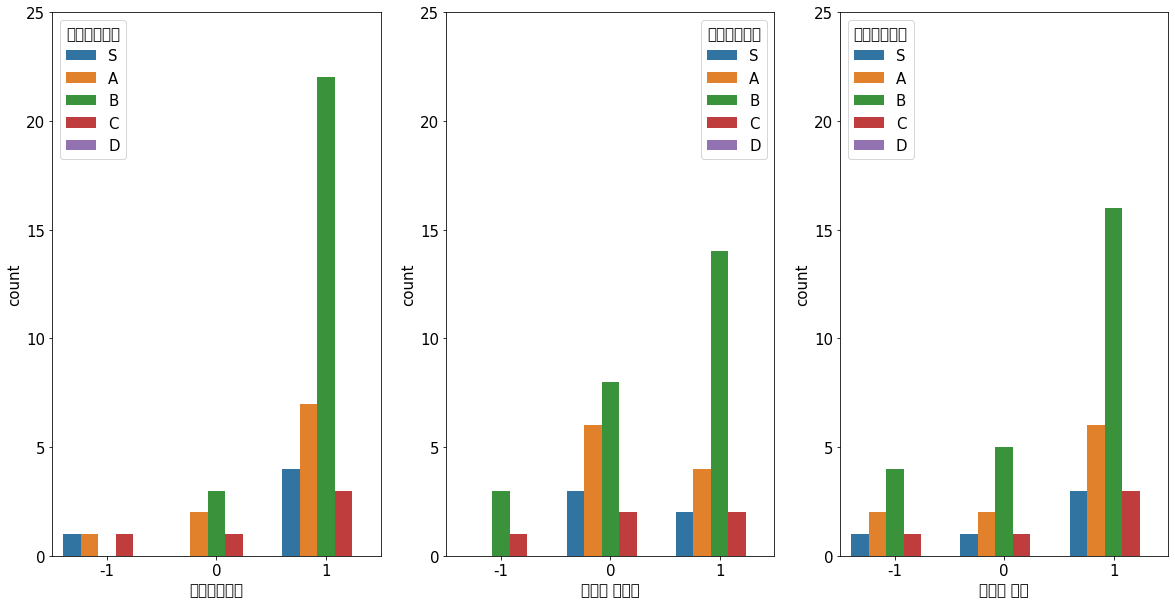

In [ ]:
from plotly.subplots import make_subplots

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(20, 10)
axes[0].set_ylim(0,25)
axes[1].set_ylim(0,25)
axes[2].set_ylim(0,25)
sns.countplot(x='직책수행능력', data=data_2020, hue='역량평가등급', ax=axes[0], hue_order=['S', 'A','B','C','D'])
sns.countplot(x='조직내 필요성', data=data_2020, hue='역량평가등급', ax=axes[1],  hue_order=['S', 'A','B','C','D'])
sns.countplot(x='동반자 의식', data=data_2020, hue='역량평가등급', ax=axes[2],  hue_order=['S', 'A','B','C','D'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52293 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49688 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54665 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45733 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47141 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51649 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

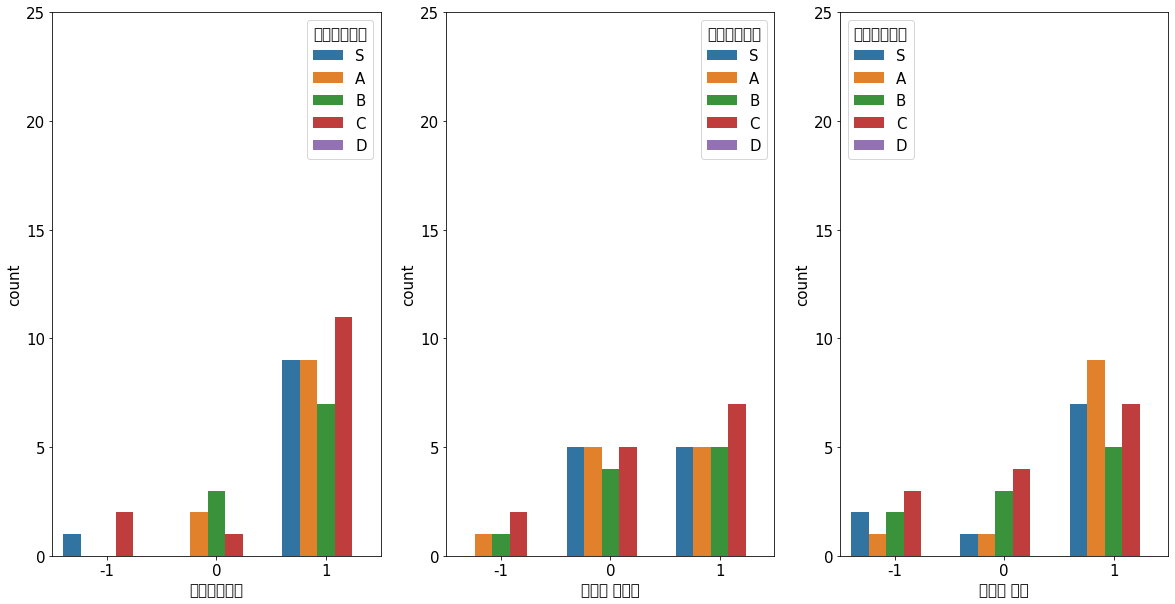

In [ ]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(20, 10)
axes[0].set_ylim(0,25)
axes[1].set_ylim(0,25)
axes[2].set_ylim(0,25)
sns.countplot(x='직책수행능력', data=data_2020, hue='업적평가등급', ax=axes[0], hue_order=['S', 'A','B','C','D'])
sns.countplot(x='조직내 필요성', data=data_2020, hue='업적평가등급', ax=axes[1],  hue_order=['S', 'A','B','C','D'])
sns.countplot(x='동반자 의식', data=data_2020, hue='업적평가등급', ax=axes[2],  hue_order=['S', 'A','B','C','D'])

In [ ]:
table = []

for i in range(len(raw_data_20)) : 
  sen = []
  if (raw_data_20['사번'][i] in data_2020['사번'].unique()) : 
    temp = data_2020.loc[data_2020['사번']==raw_data_20['사번'][i]].reset_index(drop=True)
    sen.append(temp['직책수행능력'][0])
    sen.append(temp['조직내 필요성'][0])
    sen.append(temp['동반자 의식'][0])
  else : 
    sen.append('No')
    sen.append('No')
    sen.append('No')
  table.append(sen)

In [ ]:
raw_data_20[['직책수행능력', '조직내 필요성', '동반자 의식']] = table

In [ ]:
raw_data_21 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/추가데이터/NH농협캐피탈 데이터 작업_성과관리_1111.xlsx', sheet_name=2)

In [ ]:
raw_data_21['전공'] = major['대분류']

In [ ]:
tmp = pd.DataFrame(columns=raw_data_21.columns)
for name in sen_2021 : 
  temp = raw_data_21.loc[raw_data_21['사번']==name]
  tmp = pd.concat([tmp, temp], ignore_index=True, axis=0)

In [ ]:
tmp = tmp.join(sentiment_2021.set_index('사번')['직책수행능력'], on='사번')
tmp = tmp.join(sentiment_2021.set_index('사번')['조직내 필요성'], on='사번')
tmp = tmp.join(sentiment_2021.set_index('사번')['동반자 의식'], on='사번')

In [ ]:
data_2021 = tmp
print(len(data_2021))

53


In [ ]:
temp_21 = raw_data_21
b = data_2021['사번'].tolist()

for i in range(len(raw_data_21)) : 
  if(raw_data_21['사번'][i] in b) : 
    temp_21 = temp_21.drop([i], axis=0)

temp_21 = temp_21.loc[temp_21['전문성_평균평점']!='미입사']
temp_21 = temp_21.loc[temp_21['전문성_평균평점']!='미평가']

In [ ]:
'''
# feature 유형에 따른 데이터 분포 시각화
sort = pd.DataFrame({'S':[5],'A':[4],'B':[3],'C':[2],'D':[1]}).T

data = temp_21['역량평가등급'].value_counts().sort_values(ascending=False)
data1 = pd.concat([pd.DataFrame(data),sort],axis=1).sort_values(by=0,ascending=False)

if (temp_21['역량평가등급'].dtypes=='object') : 
  # barplot
  trace = go.Bar(x = data1.index,
                text = ['{:.1f} %'.format(val) for val in (data1['역량평가등급'].values / temp_21.shape[0] * 100)],
                textposition = 'auto',
                textfont = dict(color = '#000000'),
                y = data1['역량평가등급'].values,
                )
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('역량평가등급'),
                xaxis = dict(title = '역량평가등급'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)
else : 
  # histplot
  trace = go.Box(y=temp_21['역량평가등급'], name="Boxplot", jitter=0.3, pointpos=-1.8, boxpoints='all')
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('역량평가등급'),
                xaxis = dict(title = '역량평가등급'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)
  '''

'\n# feature 유형에 따른 데이터 분포 시각화\nsort = pd.DataFrame({\'S\':[5],\'A\':[4],\'B\':[3],\'C\':[2],\'D\':[1]}).T\n\ndata = temp_21[\'역량평가등급\'].value_counts().sort_values(ascending=False)\ndata1 = pd.concat([pd.DataFrame(data),sort],axis=1).sort_values(by=0,ascending=False)\n\nif (temp_21[\'역량평가등급\'].dtypes==\'object\') : \n  # barplot\n  trace = go.Bar(x = data1.index,\n                text = [\'{:.1f} %\'.format(val) for val in (data1[\'역량평가등급\'].values / temp_21.shape[0] * 100)],\n                textposition = \'auto\',\n                textfont = dict(color = \'#000000\'),\n                y = data1[\'역량평가등급\'].values,\n                )\n  # Create layout\n  layout = dict(title = \'Distribution Of {}\'.format(\'역량평가등급\'),\n                xaxis = dict(title = \'역량평가등급\'),\n                yaxis = dict(title = \'Count\'))\n  # Create plot\n  fig = go.Figure(data=[trace], layout=layout)\n  iplot(fig)\nelse : \n  # histplot\n  trace = go.Box(y=temp_21[\'역량평가등급\'], name="Boxplot", jitter=0.

In [ ]:
'''
sort = pd.DataFrame({'S':[5],'A':[4],'B':[3],'C':[2],'D':[1]}).T

data = temp_21['업적평가등급'].value_counts().sort_values(ascending=False)
data1 = pd.concat([pd.DataFrame(data),sort],axis=1).sort_values(by=0,ascending=False)

if (temp_21['업적평가등급'].dtypes=='object') : 
  # barplot
  trace = go.Bar(x = data1.index,
                text = ['{:.1f} %'.format(val) for val in (data1['업적평가등급'].values / temp_21.shape[0] * 100)],
                textposition = 'auto',
                textfont = dict(color = '#000000'),
                y = data1['업적평가등급'].values,
                )
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('업적평가등급'),
                xaxis = dict(title = '업적평가등급'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)
else : 
  # histplot
  trace = go.Box(y=temp_21['업적평가등급'], name="Boxplot", jitter=0.3, pointpos=-1.8, boxpoints='all')
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('업적평가등급'),
                xaxis = dict(title = '업적평가등급'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)
  '''

'\nsort = pd.DataFrame({\'S\':[5],\'A\':[4],\'B\':[3],\'C\':[2],\'D\':[1]}).T\n\ndata = temp_21[\'업적평가등급\'].value_counts().sort_values(ascending=False)\ndata1 = pd.concat([pd.DataFrame(data),sort],axis=1).sort_values(by=0,ascending=False)\n\nif (temp_21[\'업적평가등급\'].dtypes==\'object\') : \n  # barplot\n  trace = go.Bar(x = data1.index,\n                text = [\'{:.1f} %\'.format(val) for val in (data1[\'업적평가등급\'].values / temp_21.shape[0] * 100)],\n                textposition = \'auto\',\n                textfont = dict(color = \'#000000\'),\n                y = data1[\'업적평가등급\'].values,\n                )\n  # Create layout\n  layout = dict(title = \'Distribution Of {}\'.format(\'업적평가등급\'),\n                xaxis = dict(title = \'업적평가등급\'),\n                yaxis = dict(title = \'Count\'))\n  # Create plot\n  fig = go.Figure(data=[trace], layout=layout)\n  iplot(fig)\nelse : \n  # histplot\n  trace = go.Box(y=temp_21[\'업적평가등급\'], name="Boxplot", jitter=0.3, pointpos=-1.8, boxpoints=\

In [ ]:
'''
sort = pd.DataFrame({'S':[5],'A':[4],'B':[3],'C':[2],'D':[1]}).T

data = temp_21['금년 교육이수 여부'].value_counts().sort_values(ascending=False)

if (temp_21['금년 교육이수 여부'].dtypes=='object') : 
  # barplot
  trace = go.Bar(x = data.index,
                text = ['{:.1f} %'.format(val) for val in (data.values / temp_21.shape[0] * 100)],
                textposition = 'auto',
                textfont = dict(color = '#000000'),
                y = data.values,
                )
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('금년 교육이수 여부'),
                xaxis = dict(title = '금년 교육이수 여부'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)
else : 
  # histplot
  trace = go.Box(y=temp_21['금년 교육이수 여부'], name="Boxplot", jitter=0.3, pointpos=-1.8, boxpoints='all')
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('금년 교육이수 여부'),
                xaxis = dict(title = '금년 교육이수 여부'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)
'''

'\nsort = pd.DataFrame({\'S\':[5],\'A\':[4],\'B\':[3],\'C\':[2],\'D\':[1]}).T\n\ndata = temp_21[\'금년 교육이수 여부\'].value_counts().sort_values(ascending=False)\n\nif (temp_21[\'금년 교육이수 여부\'].dtypes==\'object\') : \n  # barplot\n  trace = go.Bar(x = data.index,\n                text = [\'{:.1f} %\'.format(val) for val in (data.values / temp_21.shape[0] * 100)],\n                textposition = \'auto\',\n                textfont = dict(color = \'#000000\'),\n                y = data.values,\n                )\n  # Create layout\n  layout = dict(title = \'Distribution Of {}\'.format(\'금년 교육이수 여부\'),\n                xaxis = dict(title = \'금년 교육이수 여부\'),\n                yaxis = dict(title = \'Count\'))\n  # Create plot\n  fig = go.Figure(data=[trace], layout=layout)\n  iplot(fig)\nelse : \n  # histplot\n  trace = go.Box(y=temp_21[\'금년 교육이수 여부\'], name="Boxplot", jitter=0.3, pointpos=-1.8, boxpoints=\'all\')\n  # Create layout\n  layout = dict(title = \'Distribution Of {}\'.format(\'금년 교육이수 여부

In [ ]:
'''
from plotly.subplots import make_subplots

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(20, 10)
axes[0].set_ylim(0,25)
axes[1].set_ylim(0,25)
axes[2].set_ylim(0,25)
sns.countplot(x='직책수행능력', data=data_2021, hue='역량평가등급', ax=axes[0], hue_order=['S', 'A','B','C','D'])
sns.countplot(x='조직내 필요성', data=data_2021, hue='역량평가등급', ax=axes[1],  hue_order=['S', 'A','B','C','D'])
sns.countplot(x='동반자 의식', data=data_2021, hue='역량평가등급', ax=axes[2],  hue_order=['S', 'A','B','C','D'])
'''

"\nfrom plotly.subplots import make_subplots\n\nfig, axes = plt.subplots(1, 3)\nfig.set_size_inches(20, 10)\naxes[0].set_ylim(0,25)\naxes[1].set_ylim(0,25)\naxes[2].set_ylim(0,25)\nsns.countplot(x='직책수행능력', data=data_2021, hue='역량평가등급', ax=axes[0], hue_order=['S', 'A','B','C','D'])\nsns.countplot(x='조직내 필요성', data=data_2021, hue='역량평가등급', ax=axes[1],  hue_order=['S', 'A','B','C','D'])\nsns.countplot(x='동반자 의식', data=data_2021, hue='역량평가등급', ax=axes[2],  hue_order=['S', 'A','B','C','D'])\n"

In [ ]:
'''
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(20, 10)
axes[0].set_ylim(0,25)
axes[1].set_ylim(0,25)
axes[2].set_ylim(0,25)
sns.countplot(x='직책수행능력', data=data_2021, hue='업적평가등급', ax=axes[0], hue_order=['S', 'A','B','C','D'])
sns.countplot(x='조직내 필요성', data=data_2021, hue='업적평가등급', ax=axes[1],  hue_order=['S', 'A','B','C','D'])
sns.countplot(x='동반자 의식', data=data_2021, hue='업적평가등급', ax=axes[2],  hue_order=['S', 'A','B','C','D'])
'''

"\nfig, axes = plt.subplots(1, 3)\nfig.set_size_inches(20, 10)\naxes[0].set_ylim(0,25)\naxes[1].set_ylim(0,25)\naxes[2].set_ylim(0,25)\nsns.countplot(x='직책수행능력', data=data_2021, hue='업적평가등급', ax=axes[0], hue_order=['S', 'A','B','C','D'])\nsns.countplot(x='조직내 필요성', data=data_2021, hue='업적평가등급', ax=axes[1],  hue_order=['S', 'A','B','C','D'])\nsns.countplot(x='동반자 의식', data=data_2021, hue='업적평가등급', ax=axes[2],  hue_order=['S', 'A','B','C','D'])\n"

In [ ]:
table = []

for i in range(len(raw_data_21)) : 
  sen = []
  if (raw_data_21['사번'][i] in data_2021['사번'].unique()) : 
    temp = data_2021.loc[data_2021['사번']==raw_data_21['사번'][i]].reset_index(drop=True)
    sen.append(temp['직책수행능력'][0])
    sen.append(temp['조직내 필요성'][0])
    sen.append(temp['동반자 의식'][0])
  else : 
    sen.append('No')
    sen.append('No')
    sen.append('No')
  table.append(sen)

In [ ]:
raw_data_21[['직책수행능력', '조직내 필요성', '동반자 의식']] = table

In [ ]:
years_19_f = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/dataset/years_19년상.xlsx')
years_19_h = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/dataset/years_19년하.xlsx')
years_20_f = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/dataset/years_20년상.xlsx')
years_20_h = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/dataset/years_20년하.xlsx')
years_21 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/dataset/years_21년하.xlsx')

In [ ]:
length = 0
noun = 0 

okt = Okt()
text = " ".join(years_19_f['직책수행능력'])
nouns = okt.nouns(text)
words = [n for n in nouns if len(n) > 1]
stopwords = {'대한', '해당', '대해', '통한', '다소', '보이', '로서', '위해', '통해', '관련', '매우', '로써', '두루', '보임'}
words = [i for i in words if i not in stopwords]
c = Counter(words)
print("length : ", len(text))
print("noun : ", len(words))
print("most common : ", c.most_common(5))
length += len(text)
noun += len(words)

text = " ".join(years_19_f['조직내 필요성'])
nouns = okt.nouns(text)
words = [n for n in nouns if len(n) > 1]
words = [i for i in words if i not in stopwords]
c = Counter(words)
print("length : ", len(text))
print("noun : ", len(words))
print("most common : ", c.most_common(5))
length += len(text)
noun += len(words)

text = " ".join(years_19_f['동반자 의식'])
nouns = okt.nouns(text)
words = [n for n in nouns if len(n) > 1]
words = [i for i in words if i not in stopwords]
c = Counter(words)
print("length : ", len(text))
print("noun : ", len(words))
print("most common : ", c.most_common(5))
length += len(text)
noun += len(words)

print("19_f length :", length)
print("19_f noun :", noun)

length :  16413
noun :  2823
most common :  [('업무', 211), ('수행', 189), ('능력', 189), ('직책', 121), ('경험', 86)]
length :  15849
noun :  2628
most common :  [('조직', 258), ('발전', 198), ('업무', 103), ('반드시', 56), ('노력', 53)]
length :  14853
noun :  2233
most common :  [('근무', 149), ('업무', 112), ('직원', 108), ('조직', 55), ('능력', 44)]
19_f length : 47115
19_f noun : 7684


In [ ]:
length = 0
noun = 0 

okt = Okt()
text = " ".join(years_19_h['직책수행능력'])
nouns = okt.nouns(text)
words = [n for n in nouns if len(n) > 1]
stopwords = {'대한', '해당', '대해', '통한', '다소', '보이', '로서', '위해', '통해', '관련', '매우', '로써', '두루', '보임'}
words = [i for i in words if i not in stopwords]
c = Counter(words)
print("length : ", len(text))
print("noun : ", len(words))
print("most common : ", c.most_common(5))
length += len(text)
noun += len(words)

text = " ".join(years_19_h['조직내 필요성'])
nouns = okt.nouns(text)
words = [n for n in nouns if len(n) > 1]
words = [i for i in words if i not in stopwords]
c = Counter(words)
print("length : ", len(text))
print("noun : ", len(words))
print("most common : ", c.most_common(5))
length += len(text)
noun += len(words)

text = " ".join(years_19_h['동반자 의식'])
nouns = okt.nouns(text)
words = [n for n in nouns if len(n) > 1]
words = [i for i in words if i not in stopwords]
c = Counter(words)
print("length : ", len(text))
print("noun : ", len(words))
print("most common : ", c.most_common(5))
length += len(text)
noun += len(words)

print("19_h length :", length)
print("19_h noun :", noun)

length :  14822
noun :  2517
most common :  [('능력', 174), ('업무', 168), ('수행', 163), ('직책', 106), ('지식', 59)]
length :  15281
noun :  2568
most common :  [('조직', 276), ('발전', 219), ('업무', 78), ('기여', 60), ('반드시', 56)]
length :  13866
noun :  2056
most common :  [('근무', 171), ('업무', 97), ('직원', 91), ('조직', 58), ('능력', 47)]
19_h length : 43969
19_h noun : 7141


In [ ]:
length = 0
noun = 0 

okt = Okt()
text = " ".join(years_20_f['직책수행능력'])
nouns = okt.nouns(text)
words = [n for n in nouns if len(n) > 1]
stopwords = {'대한', '해당', '대해', '통한', '다소', '보이', '로서', '위해', '통해', '관련', '매우', '로써', '두루', '보임'}
words = [i for i in words if i not in stopwords]
c = Counter(words)
print("length : ", len(text))
print("noun : ", len(words))
print("most common : ", c.most_common(5))
length += len(text)
noun += len(words)

text = " ".join(years_20_f['조직내 필요성'])
nouns = okt.nouns(text)
words = [n for n in nouns if len(n) > 1]
words = [i for i in words if i not in stopwords]
c = Counter(words)
print("length : ", len(text))
print("noun : ", len(words))
print("most common : ", c.most_common(5))
length += len(text)
noun += len(words)

text = " ".join(years_20_f['동반자 의식'])
nouns = okt.nouns(text)
words = [n for n in nouns if len(n) > 1]
words = [i for i in words if i not in stopwords]
c = Counter(words)
print("length : ", len(text))
print("noun : ", len(words))
print("most common : ", c.most_common(5))
length += len(text)
noun += len(words)

print("20_f length :", length)
print("20_f noun :", noun)

length :  10541
noun :  1684
most common :  [('능력', 183), ('수행', 134), ('직책', 93), ('업무', 89), ('보유', 54)]
length :  10344
noun :  1655
most common :  [('조직', 201), ('발전', 196), ('지속', 50), ('업무', 42), ('필요', 40)]
length :  9302
noun :  1293
most common :  [('근무', 177), ('업무', 48), ('직원', 45), ('계속', 43), ('평가', 37)]
20_f length : 30187
20_f noun : 4632


In [ ]:
length = 0
noun = 0 

okt = Okt()
text = " ".join(years_20_h['직책수행능력'])
nouns = okt.nouns(text)
words = [n for n in nouns if len(n) > 1]
stopwords = {'대한', '해당', '대해', '통한', '다소', '보이', '로서', '위해', '통해', '관련', '매우', '로써', '두루', '보임'}
words = [i for i in words if i not in stopwords]
c = Counter(words)
print("length : ", len(text))
print("noun : ", len(words))
print("most common : ", c.most_common(5))
length += len(text)
noun += len(words)

text = " ".join(years_20_h['조직내 필요성'])
nouns = okt.nouns(text)
words = [n for n in nouns if len(n) > 1]
words = [i for i in words if i not in stopwords]
c = Counter(words)
print("length : ", len(text))
print("noun : ", len(words))
print("most common : ", c.most_common(5))
length += len(text)
noun += len(words)

text = " ".join(years_20_h['동반자 의식'])
nouns = okt.nouns(text)
words = [n for n in nouns if len(n) > 1]
words = [i for i in words if i not in stopwords]
c = Counter(words)
print("length : ", len(text))
print("noun : ", len(words))
print("most common : ", c.most_common(5))
length += len(text)
noun += len(words)

print("20_h length :", length)
print("20_h noun :", noun)

length :  13903
noun :  2266
most common :  [('능력', 236), ('수행', 191), ('업무', 136), ('직책', 125), ('경험', 59)]
length :  13703
noun :  2210
most common :  [('조직', 271), ('발전', 218), ('지속', 84), ('업무', 69), ('기여', 57)]
length :  12128
noun :  1688
most common :  [('근무', 240), ('계속', 76), ('업무', 60), ('직원', 53), ('조직', 47)]
20_h length : 39734
20_h noun : 6164


In [ ]:
length = 0
noun = 0 

okt = Okt()
text = " ".join(years_21['직책수행능력'])
nouns = okt.nouns(text)
words = [n for n in nouns if len(n) > 1]
stopwords = {'대한', '해당', '대해', '통한', '다소', '보이', '로서', '위해', '통해', '관련', '매우', '로써', '두루', '보임'}
words = [i for i in words if i not in stopwords]
c = Counter(words)
print("length : ", len(text))
print("noun : ", len(words))
print("most common : ", c.most_common(5))
length += len(text)
noun += len(words)

text = " ".join(years_21['조직내 필요성'])
nouns = okt.nouns(text)
words = [n for n in nouns if len(n) > 1]
words = [i for i in words if i not in stopwords]
c = Counter(words)
print("length : ", len(text))
print("noun : ", len(words))
print("most common : ", c.most_common(5))
length += len(text)
noun += len(words)

text = " ".join(years_21['동반자 의식'])
nouns = okt.nouns(text)
words = [n for n in nouns if len(n) > 1]
words = [i for i in words if i not in stopwords]
c = Counter(words)
print("length : ", len(text))
print("noun : ", len(words))
print("most common : ", c.most_common(5))
length += len(text)
noun += len(words)

print("21 length :", length)
print("21 noun :", noun)

length :  13891
noun :  2241
most common :  [('능력', 220), ('수행', 187), ('직책', 141), ('업무', 132), ('보유', 58)]
length :  13657
noun :  2176
most common :  [('조직', 292), ('발전', 254), ('지속', 93), ('업무', 63), ('평가', 60)]
length :  12409
noun :  1739
most common :  [('근무', 272), ('계속', 99), ('평가', 76), ('대상자', 70), ('업무', 63)]
21 length : 39957
21 noun : 6156


In [ ]:
# feature 유형에 따른 데이터 분포 시각화
data = major['대분류'].value_counts().sort_values(ascending=False)
if (major['대분류'].dtypes=='object') : 
  # barplot
  trace = go.Bar(x = data.index,
                text = ['{:.1f} %'.format(val) for val in (data.values / major.shape[0] * 100)],
                textposition = 'auto',
                textfont = dict(color = '#000000'),
                y = data.values,
                )
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('대분류'),
                xaxis = dict(title = '대분류'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)
else : 
  # histplot
  trace = go.Box(y=major['대분류'], name="Boxplot", jitter=0.3, pointpos=-1.8, boxpoints='all')
  # Create layout
  layout = dict(title = 'Distribution Of {}'.format('대분류'),
                xaxis = dict(title = '대분류'),
                yaxis = dict(title = 'Count'))
  # Create plot
  fig = go.Figure(data=[trace], layout=layout)
  iplot(fig)

In [ ]:
data_2021

,사번,성명,연락처,이메일,생년월일,본부,실,팀,직무,직급,...,동반자 의식_평균평점,2019_역량평가등급,2019_업적평가등급,2020_역량평가등급,2020_업적평가등급,역량평가등급,업적평가등급,직책수행능력,조직내 필요성,동반자 의식
0,B1010009,송준석,010-5387-8496,james@nhcapital.co.kr,1971-12-19,리스크관리본부,NaN,NaN,부서총괄,이사대우,...,2.9,A,A,A,A,S,S,1,1,1
1,B1710004,김동옥,010-7404-6704,kdo@nhcapital.co.kr,1971-10-21,기업금융본부,NaN,NaN,부서총괄,이사대우,...,2.75,S,S,S,S,S,S,1,0,1
2,B0810012,이유,010-2881-7747,leeu@nhcapital.co.kr,1969-06-28,디지털금융본부,NaN,NaN,부서총괄,이사대우,...,2.571429,A,A,S,S,S,S,1,0,1
3,B0810011,김규오,010-3767-5867,gokim@nhcapital.co.kr,1969-06-06,NaN,금융소비자보호총괄책임자,NaN,부서총괄,이사대우,...,3,C,A,B,C,A,A,1,1,0
4,B1110051,조인철,010-8948-0507,inchuljo@nhcapital.co.kr,1971-09-23,전략금융본부,전략영업실,NaN,부서총괄,이사대우,...,3,C,C,A,A,S,S,1,1,1
5,B0910004,김병림,010-5665-1905,philia@nhcapital.co.kr,1969-02-01,전략금융본부,NaN,NaN,부서총괄,이사대우,...,2.857143,A,A,S,S,S,S,1,0,0
6,B0910007,고봉근,010-4211-5543,bgko@nhcapital.co.kr,1969-03-20,리테일금융본부,리테일금융실,NaN,부서총괄,이사대우,...,2.9,S,S,B,B,S,S,1,1,1
7,B1010038,이지현,010-2675-2577,hyunismart@nhcapital.co.kr,1978-02-08,여신관리본부,여신심사실,NaN,부서총괄,이사대우,...,2.727273,B,A,S,S,S,S,1,1,1
8,B1110078,윤희성,010-4577-8438,mika55@nhcapital.co.kr,1972-05-05,디지털금융본부,디지털영업실,NaN,부서총괄,이사대우,...,2.764706,B,S,B,S,S,S,1,0,1
9,B1110069,정성철,010-3635-7248,daebary@nhcapital.co.kr,1970-07-07,여신관리본부,여신관리실,NaN,부서총괄,이사대우,...,2.615385,A,B,B,S,S,S,1,1,0


In [ ]:
metric_feature = ['전문성_평균평점', '리더십_평균평점', '부하육성_평균평점', '관계관리_평균평점',
       '조직비전_평균평점', '직책수행능력_평균평점', '조직내 필요성_평균평점', '동반자 의식_평균평점']

temp_19 = temp_19.drop(metric_feature, axis=1)
temp_20 = temp_20.drop(metric_feature, axis=1)
temp_21 = temp_21.drop(metric_feature, axis=1)

In [ ]:
data_2019 = data_2019.sort_values(by='사번')
data_2020 = data_2020.sort_values(by='사번')
data_2021 = data_2021.sort_values(by='사번')

In [ ]:
temp_19 = temp_19.sort_values(by='사번')
temp_20 = temp_20.sort_values(by='사번')
temp_21 = temp_21.sort_values(by='사번')

In [ ]:
user_data_19 = data_2019['사번'].tolist()
user_temp_19 = temp_19['사번'].tolist()
user_all_19 = raw_data_19['사번'].tolist()


user_all_19 = [x for x in user_all_19 if x not in user_data_19]
user_all_19 = [x for x in user_all_19 if x not in user_temp_19]

print(len(user_all_19) + len(user_data_19) + len(user_temp_19))

index_19 = []
for i in range(len(raw_data_19)) :
  for name in user_all_19 : 
    if raw_data_19['사번'][i]==name : 
      index_19.append(i)

no_19 = raw_data_19.iloc[index_19]
no_19 = no_19.drop(metric_feature, axis=1)
no_19 = no_19.drop(['직책수행능력', '조직내 필요성', '동반자 의식'], axis=1)
temp_19 = pd.concat([temp_19, no_19], axis=0)

296


In [ ]:
user_data_20 = data_2020['사번'].tolist()
user_temp_20 = temp_20['사번'].tolist()
user_all_20 = raw_data_20['사번'].tolist()


user_all_20 = [x for x in user_all_20 if x not in user_data_20]
user_all_20 = [x for x in user_all_20 if x not in user_temp_20]

print(len(user_all_20) + len(user_data_20) + len(user_temp_20))

index_20 = []
for i in range(len(raw_data_20)) :
  for name in user_all_20 : 
    if raw_data_20['사번'][i]==name : 
      index_20.append(i)

no_20 = raw_data_20.iloc[index_20]
no_20 = no_20.drop(metric_feature, axis=1)
no_20 = no_20.drop(['직책수행능력', '조직내 필요성', '동반자 의식'], axis=1)
temp_20 = pd.concat([temp_20, no_20], axis=0)

296


In [ ]:
user_data_21 = data_2021['사번'].tolist()
user_temp_21 = temp_21['사번'].tolist()
user_all_21 = raw_data_21['사번'].tolist()


user_all_21 = [x for x in user_all_21 if x not in user_data_21]
user_all_21 = [x for x in user_all_21 if x not in user_temp_21]

print(len(user_all_21) + len(user_data_21) + len(user_temp_21))

index_21 = []
for i in range(len(raw_data_21)) :
  for name in user_all_21 : 
    if raw_data_21['사번'][i]==name : 
      index_21.append(i)

no_21 = raw_data_21.iloc[index_21]
no_21 = no_21.drop(metric_feature, axis=1)
no_21 = no_21.drop(['직책수행능력', '조직내 필요성', '동반자 의식'], axis=1)
temp_21 = pd.concat([temp_21, no_21], axis=0)

296


In [ ]:

data_2019.to_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/modeling/subject_19.xlsx', index=False)
data_2020.to_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/modeling/subject_20.xlsx', index=False)
data_2021.to_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/modeling/subject_21.xlsx', index=False)
temp_19.to_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/modeling/nosubject_19.xlsx', index=False)
temp_20.to_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/modeling/nosubject_20.xlsx', index=False)
temp_21.to_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/modeling/nosubject_21.xlsx', index=False)


In [ ]:
mind = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/dataset/인적성 검사 데이터_1117.xlsx')

In [ ]:
mind_data = mind.copy()
temp_19_m = temp_19.copy()
temp_20_m = temp_20.copy()
temp_21_m = temp_21.copy()

In [ ]:
mind_feature = ['긍정성', '적극성', '성실성', '사회성', '정체성', '관계성', '객관성',
       '비활성', '과활성', '자기긍정', '기회긍정', '환경긍정', '성취추구', '인정추구', '성장추구', '점검행동',
       '조절행동', '유지행동', '감정인식', '맥락이해', '관계대응', '성찰성', '수용성', '능동성', '공감성',
       '우호성', '협력성', '도덕성', '정직성', '책임성', '우울성(저항성)', '부정성(저항성)', '태만성(저항성)', '불안성(저항성)', '충동성(저항성)',
       '공격성(저항성)', '역량 평균']

for name in mind_feature : 
  temp_19_m = temp_19_m.join(mind_data.set_index('이메일')[name], on='이메일')
  temp_20_m = temp_20_m.join(mind_data.set_index('이메일')[name], on='이메일')
  temp_21_m = temp_21_m.join(mind_data.set_index('이메일')[name], on='이메일')

In [ ]:
temp_19_m.to_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/modeling/mind_19.xlsx', index=False)
temp_20_m.to_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/modeling/mind_20.xlsx', index=False)
temp_21_m.to_excel('/content/drive/My Drive/Colab Notebooks/NH농협캐피탈/modeling/mind_21.xlsx', index=False)